In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font',family='Hancom Gothic')

#  데이터 체크

In [3]:
df_2021 = pd.read_csv('행정인구자료/2021년행정인구자료_기준일ID_연월일_시간대구분_시간.csv')
df_2021

,총생활인구수,일시,행정구
0,14473.8890,2021-01-01 00:00:00,종로구
1,13299.5313,2021-01-01 00:00:00,종로구
2,15518.3772,2021-01-01 00:00:00,종로구
3,5108.9481,2021-01-01 00:00:00,종로구
4,7907.7246,2021-01-01 00:00:00,종로구
...,...,...,...
3714235,21687.6749,2021-12-31 23:00:00,양천구
3714236,56597.5455,2021-12-31 23:00:00,강동구
3714237,33165.7067,2021-12-31 23:00:00,강서구
3714238,36194.0265,2021-12-31 23:00:00,광진구


In [18]:
df_2021_using = df_2021.groupby(['일시','행정구'],as_index=False)['총생활인구수'].sum()
df_2021_using.to_csv('행정인구자료/2021년일시행정구생활인구수.csv',index=False)

In [19]:
df_2022 = pd.read_csv('행정인구자료/2022년_시간대구분있는_인구수.csv')
df_2022=df_2022[['기준일ID','시간대구분','자치구코드','총생활인구수']]
df_2022

,기준일ID,시간대구분,자치구코드,총생활인구수
0,20220101,0,11110,198013.1166
1,20220101,0,11140,163439.6365
2,20220101,0,11170,252165.9659
3,20220101,0,11200,312343.4234
4,20220101,0,11215,348524.3239
...,...,...,...,...
218995,20221231,23,11620,468533.2179
218996,20221231,23,11650,464794.4332
218997,20221231,23,11680,626217.7021
218998,20221231,23,11710,726058.1872


In [20]:
# 22년 ~ 24년 데이터는 행정코드와 행정구 매핑 필요 => df_gu
df_gu = pd.read_excel('행정인구자료/행정동코드_매핑정보_20241218.xlsx',sheet_name='유입지코드')
df_gu.columns=['자치구코드','drop','행정구']
df_gu.drop('drop',axis=1,inplace=True)
df_gu

,자치구코드,행정구
0,11110,종로구
1,11140,중구
2,11170,용산구
3,11200,성동구
4,11215,광진구
5,11230,동대문구
6,11260,중랑구
7,11290,성북구
8,11305,강북구
9,11320,도봉구


In [25]:
df_2022_using = pd.merge(df_2022,df_gu,on='자치구코드')
df_2022_using.drop(['자치구코드'],axis=1, inplace=True)
df_2022_using.head(2)

,기준일ID,시간대구분,총생활인구수,행정구
0,20220101,0,198013.1166,종로구
1,20220101,1,195576.0080,종로구


In [33]:
# 21년 형태처럼 총생활인구수-일시-행정구 형태로 변환
df_2022_using['기준일ID'] = pd.to_datetime(df_2022_using['기준일ID'].astype(str), format='%Y%m%d')
df_2022_using['시간대구분'] = pd.to_timedelta(df_2022_using['시간대구분'], unit='h')
df_2022_using['일시'] = df_2022_using['기준일ID'] + df_2022_using['시간대구분']

In [36]:
df_2022_using = df_2022_using[df_2021_using.columns]
df_2022_using.to_csv('행정인구자료/2022년일시행정구생활인구수.csv',index=False)

In [42]:
df_2023 = pd.read_csv('행정인구자료/2023년_시간대구분있는_인구수.csv')
df_2023=df_2023[['기준일ID','시간대구분','자치구코드','총생활인구수']]
# 22년 ~ 24년 데이터는 행정코드와 행정구 매핑 필요 => df_gu
df_gu = pd.read_excel('행정인구자료/행정동코드_매핑정보_20241218.xlsx',sheet_name='유입지코드')
df_gu.columns=['자치구코드','drop','행정구']
df_gu.drop('drop',axis=1,inplace=True)
df_2023_using = pd.merge(df_2023,df_gu,on='자치구코드')
df_2023_using.drop(['자치구코드'],axis=1, inplace=True)
# 21년 형태처럼 총생활인구수-일시-행정구 형태로 변환
df_2023_using['기준일ID'] = pd.to_datetime(df_2023_using['기준일ID'].astype(str), format='%Y%m%d')
df_2023_using['시간대구분'] = pd.to_timedelta(df_2023_using['시간대구분'], unit='h')
df_2023_using['일시'] = df_2023_using['기준일ID'] + df_2023_using['시간대구분']
df_2023_using = df_2023_using[df_2021_using.columns]
df_2023_using.to_csv('행정인구자료/2023년일시행정구생활인구수.csv',index=False)
df_2023_using

,일시,행정구,총생활인구수
0,2023-01-01 00:00:00,종로구,211983.7554
1,2023-01-01 01:00:00,종로구,199999.1524
2,2023-01-01 02:00:00,종로구,197028.3577
3,2023-01-01 03:00:00,종로구,195115.2067
4,2023-01-01 04:00:00,종로구,194078.7522
...,...,...,...
218995,2023-12-31 19:00:00,강동구,499483.0067
218996,2023-12-31 20:00:00,강동구,504338.4288
218997,2023-12-31 21:00:00,강동구,511490.6773
218998,2023-12-31 22:00:00,강동구,516365.1128


In [44]:
df_2024 = pd.read_csv('행정인구자료/2024년_시간대구분있는_인구수.csv')
df_2024=df_2024[['기준일ID','시간대구분','자치구코드','총생활인구수']]
# 22년 ~ 24년 데이터는 행정코드와 행정구 매핑 필요 => df_gu
df_gu = pd.read_excel('행정인구자료/행정동코드_매핑정보_20241218.xlsx',sheet_name='유입지코드')
df_gu.columns=['자치구코드','drop','행정구']
df_gu.drop('drop',axis=1,inplace=True)
df_2024_using = pd.merge(df_2024,df_gu,on='자치구코드')
df_2024_using.drop(['자치구코드'],axis=1, inplace=True)
# 21년 형태처럼 총생활인구수-일시-행정구 형태로 변환
df_2024_using['기준일ID'] = pd.to_datetime(df_2024_using['기준일ID'].astype(str), format='%Y%m%d')
df_2024_using['시간대구분'] = pd.to_timedelta(df_2024_using['시간대구분'], unit='h')
df_2024_using['일시'] = df_2024_using['기준일ID'] + df_2024_using['시간대구분']
df_2024_using = df_2024_using[df_2021_using.columns]
df_2024_using.to_csv('행정인구자료/2024년일시행정구생활인구수.csv',index=False)

In [46]:
df_2025 = pd.read_csv('행정인구자료/2025년행정인구자료_기준일ID_연월일_시간대구분_시간.csv')
df_2025_using = df_2025.groupby(['일시','행정구'],as_index=False)['총생활인구수'].sum()
df_2025_using.to_csv('행정인구자료/2025년일시행정구생활인구수.csv',index=False)

In [48]:
df_total = pd.concat([df_2021_using,df_2022_using,df_2023_using,df_2024_using,df_2025_using],axis=0)

In [52]:
bike_2021 = pd.read_csv('따릉이정보_25년은예측값활용필요/2021년따릉이연도일월시대여소번호대여량.csv')
bike_2022 = pd.read_csv('따릉이정보_25년은예측값활용필요/2022년따릉이연도일월시대여소번호대여량.csv')
bike_2023 = pd.read_csv('따릉이정보_25년은예측값활용필요/2023년따릉이연도일월시대여소번호대여량.csv')
bike_2024 = pd.read_csv('따릉이정보_25년은예측값활용필요/2024년따릉이연도일월시대여소번호대여량.csv')

In [53]:
bike_2021.shape,bike_2022.shape,bike_2023.shape,bike_2024.shape

((217971, 7), (218069, 7), (218786, 7), (219464, 7))

In [55]:
bike_total = pd.concat([bike_2021,bike_2022,bike_2023,bike_2024],axis=0)
bike_total

,연도,월,일,시,행정구,일시,대여량
0,2021,1,1,0,강남구,2021-01-01 00:00:00,9
1,2021,1,1,0,강동구,2021-01-01 00:00:00,12
2,2021,1,1,0,강북구,2021-01-01 00:00:00,12
3,2021,1,1,0,강서구,2021-01-01 00:00:00,27
4,2021,1,1,0,관악구,2021-01-01 00:00:00,19
...,...,...,...,...,...,...,...
219459,2024,12,31,23,용산구,2024-12-31 23:00:00,37
219460,2024,12,31,23,은평구,2024-12-31 23:00:00,35
219461,2024,12,31,23,종로구,2024-12-31 23:00:00,81
219462,2024,12,31,23,중구,2024-12-31 23:00:00,77


# 생활인구수와 자전거 대여량 시각화

In [57]:
bike_and_popul = pd.merge(df_total,bike_total,on=['일시','행정구'])
bike_and_popul.to_csv('일시행정구총생활인구수연도월일시대여량_요일피쳐만넣으면되는자료.csv')

In [66]:
data_popul_quantity = bike_and_popul.groupby(['일시'],as_index=False)[['총생활인구수','대여량']].sum()

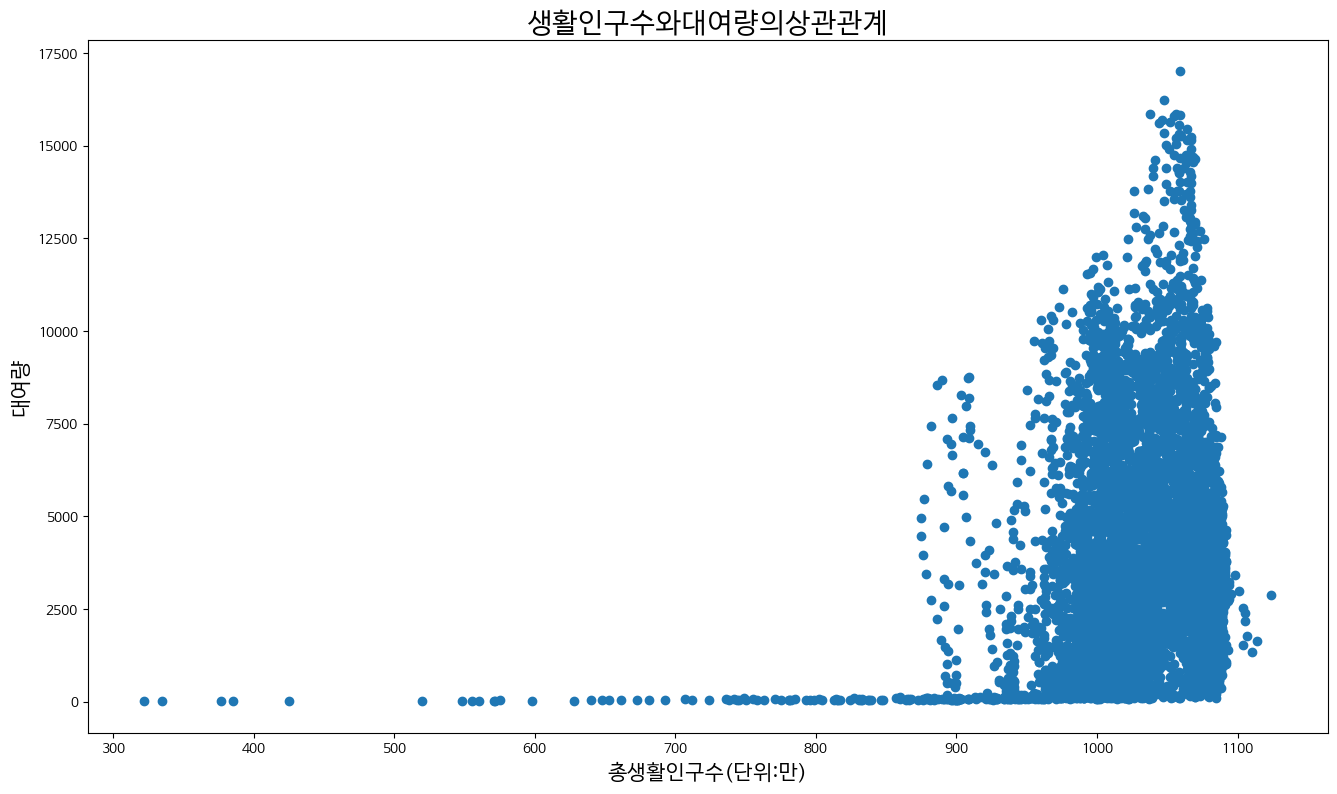

In [77]:
plt.figure(figsize=(16,9))
plt.scatter(data_popul_quantity['총생활인구수']//10000,data_popul_quantity['대여량'])
plt.xlabel('총생활인구수(단위:만)',size=15)
plt.ylabel('대여량',size=15)
plt.title('생활인구수와대여량의상관관계',size=20)
plt.show()

<font size=6> 인구수에 따라 대여량이 변화하는 것으로 확인되며 인구수를 feature에 사용 </font>

# 행정구별 자전거 대여량 시각화

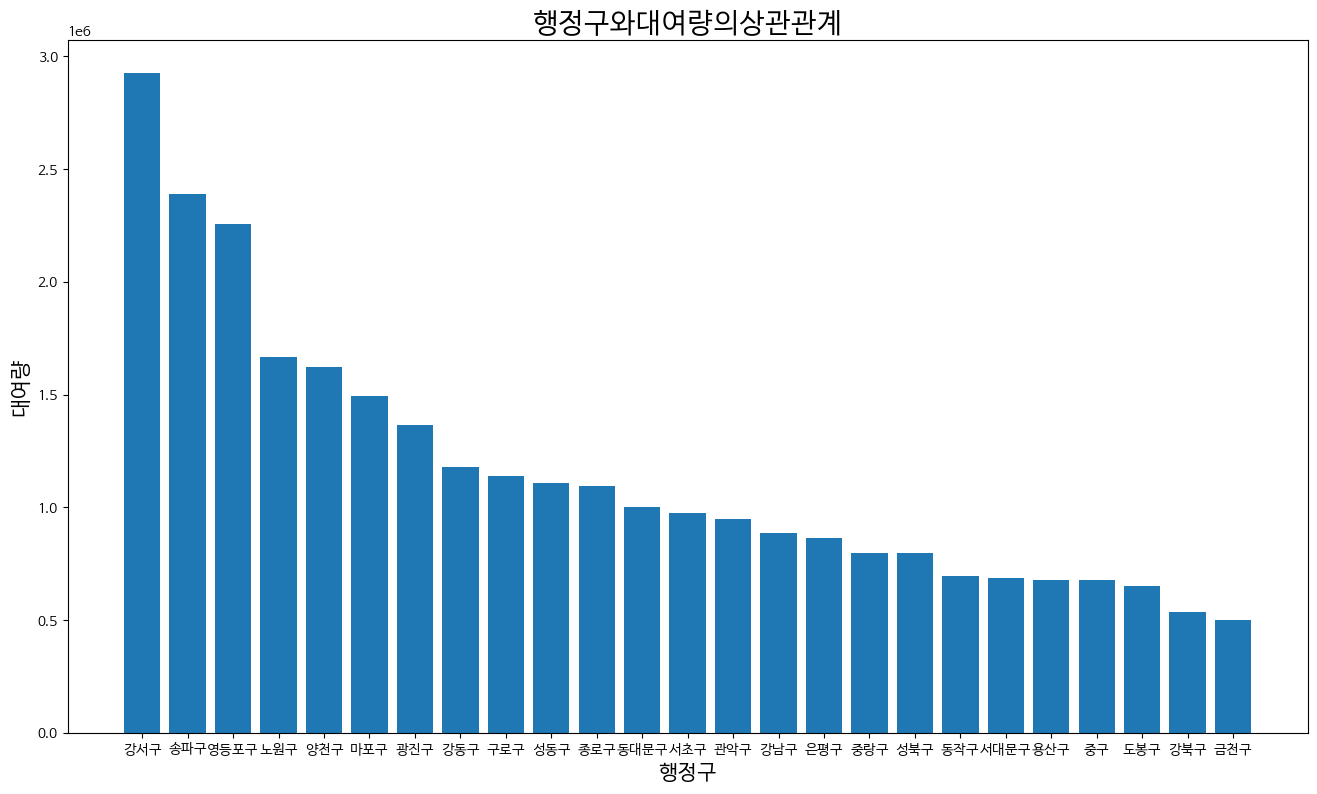

In [82]:
data_popul_quantity = bike_and_popul.groupby(['행정구'],as_index=False)['대여량'].sum().sort_values('대여량',ascending=False)
plt.figure(figsize=(16,9))
plt.bar(data_popul_quantity['행정구'],data_popul_quantity['대여량'])
plt.xlabel('행정구',size=15)
plt.ylabel('대여량',size=15)
plt.title('행정구와대여량의상관관계',size=20)
plt.show()

<font size=6> 행정구에 따라 대여량이 변화하는 것으로 확인되며 행정구를 feature에 사용 </font>

# 시간대에 따른 자전거 대여량 시각화

In [84]:
bike_and_popul

,일시,행정구,총생활인구수,연도,월,일,시,대여량
0,2021-01-01 00:00:00,강남구,618455.4297,2021,1,1,0,9
1,2021-01-01 00:00:00,강동구,525220.6638,2021,1,1,0,12
2,2021-01-01 00:00:00,강북구,321499.2460,2021,1,1,0,12
3,2021-01-01 00:00:00,강서구,547287.6699,2021,1,1,0,27
4,2021-01-01 00:00:00,관악구,492742.3420,2021,1,1,0,19
...,...,...,...,...,...,...,...,...
217966,2021-12-31 23:00:00,용산구,255083.8140,2021,12,31,23,15
217967,2021-12-31 23:00:00,은평구,465260.2944,2021,12,31,23,20
217968,2021-12-31 23:00:00,종로구,200178.1168,2021,12,31,23,26
217969,2021-12-31 23:00:00,중구,167669.4876,2021,12,31,23,7


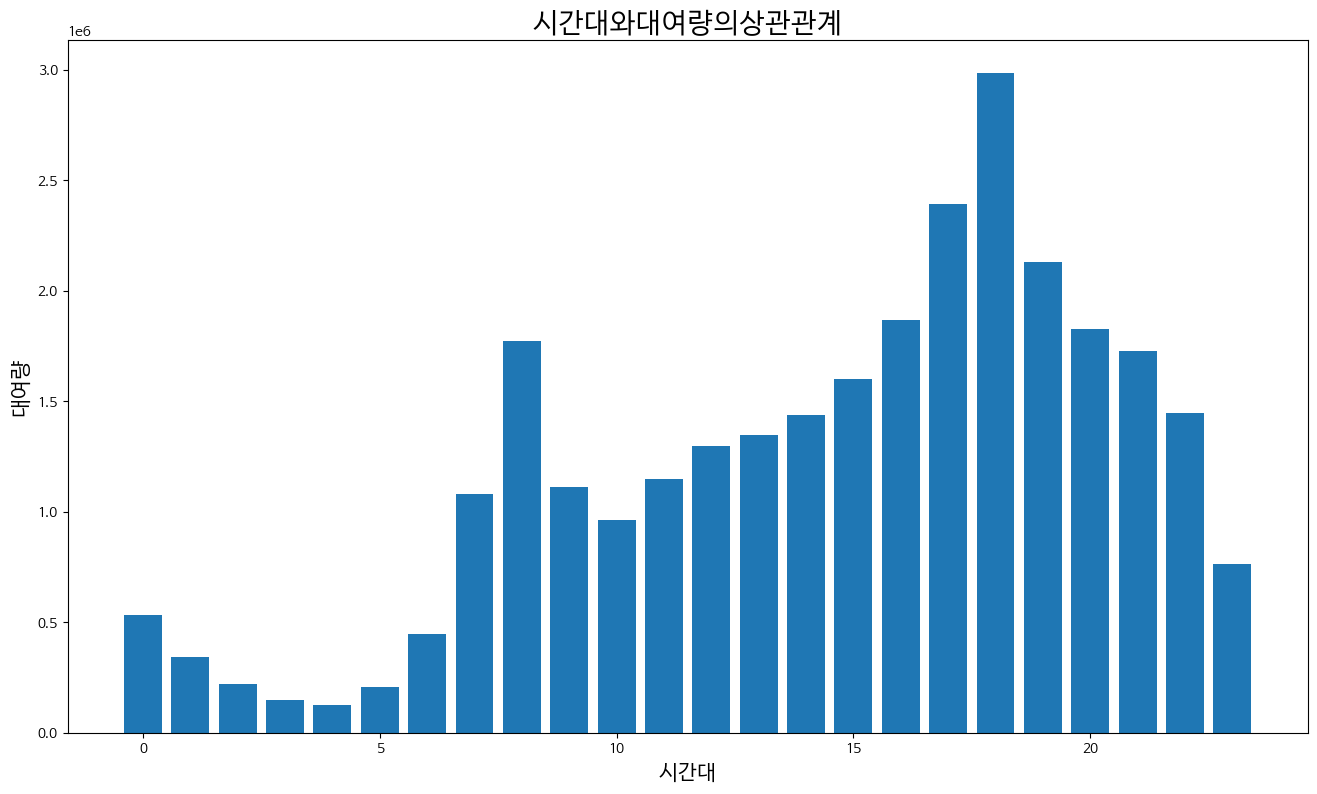

In [85]:
data_popul_quantity = bike_and_popul.groupby(['시'],as_index=False)['대여량'].sum().sort_values('시',ascending=False)
plt.figure(figsize=(16,9))
plt.bar(data_popul_quantity['시'],data_popul_quantity['대여량'])
plt.xlabel('시간대',size=15)
plt.ylabel('대여량',size=15)
plt.title('시간대와대여량의상관관계',size=20)
plt.show()